In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

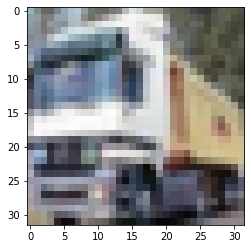

In [6]:
plt.imshow(X_train[1])

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane" , "automobile" , "bird" , "cat" , "deer" , "dog" , "frog", "horse", "ship" , "truck"]

In [9]:
def plot_image(X,y, index):
    plt.figure(figsize = (15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

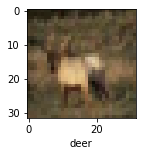

In [10]:
plot_image(X_train, y_train , 3)

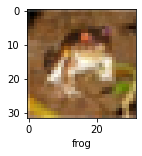

In [15]:
plot_image(X_train, y_train , 0)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [21]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32 , 32 , 3)),
    layers.Dense(3000 , activation="relu"),
    layers.Dense(1000 , activation="relu"),
    layers.Dense(10 , activation="sigmoid")
    
])

ann.compile(optimizer = "SGD" , loss= "sparse_categorical_crossentropy" , 
           metrics = ["accuracy"])

ann.fit(X_train , y_train , epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.8151 - accuracy: 0.3559
Epoch 2/5
1563/1563 [==============================] - 109s 69ms/step - loss: 1.6244 - accuracy: 0.4252
Epoch 3/5
1563/1563 [==============================] - 112s 71ms/step - loss: 1.5442 - accuracy: 0.4567
Epoch 4/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.4834 - accuracy: 0.4803
Epoch 5/5
1563/1563 [==============================] - 107s 69ms/step - loss: 1.4313 - accuracy: 0.4959


In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 7s 22ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.45      0.50      1000
           1       0.60      0.58      0.59      1000
           2       0.48      0.15      0.23      1000
           3       0.31      0.51      0.39      1000
           4       0.42      0.46      0.44      1000
           5       0.46      0.25      0.33      1000
           6       0.54      0.51      0.53      1000
           7       0.77      0.29      0.42      1000
           8       0.36      0.86      0.51      1000
           9       0.51      0.49      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4927 - accuracy: 0.4600
Epoch 2/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.1388 - accuracy: 0.5983
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0106 - accuracy: 0.6488
Epoch 4/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9297 - accuracy: 0.6765
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8652 - accuracy: 0.6991
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8172 - accuracy: 0.7155
Epoch 7/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7720 - accuracy: 0.7325
Epoch 8/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7317 - accuracy: 0.7446
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7008 - accuracy: 0.7558
Epoch 10/10
1563/1563 [==============================] - 44s 28m

In [26]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.9382 - accuracy: 0.6918


[0.9382487535476685, 0.6917999982833862]

In [27]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 9ms/step


array([[4.1893491e-04, 7.0537709e-07, 3.2491551e-04, 9.5521575e-01,
        5.1161688e-04, 1.9113217e-02, 1.6695155e-02, 4.4747136e-05,
        7.6597659e-03, 1.5063028e-05],
       [6.4865649e-02, 4.5314884e-01, 3.0807388e-04, 4.7456581e-07,
        5.1184617e-08, 2.6500436e-07, 8.7885532e-08, 1.9074845e-07,
        4.7358343e-01, 8.0929250e-03],
       [3.9138388e-02, 4.0159907e-02, 1.3659238e-03, 5.5605941e-03,
        6.3691814e-03, 3.9376889e-04, 6.0401659e-04, 3.0985088e-03,
        8.6993361e-01, 3.3376157e-02],
       [9.2840528e-01, 1.1811445e-03, 3.4647275e-02, 3.2682216e-05,
        1.1060549e-03, 9.0173407e-06, 1.5118951e-04, 1.3621948e-05,
        3.4429979e-02, 2.3633558e-05],
       [3.5443484e-06, 1.7538738e-06, 4.8958701e-03, 4.0847315e-03,
        6.8629330e-01, 6.4239569e-04, 3.0401704e-01, 1.1745857e-06,
        6.0053513e-05, 1.8353174e-07]], dtype=float32)

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

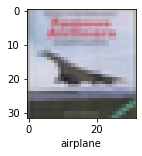

In [31]:
plot_image(X_test, y_test,3)


In [32]:
classes[y_classes[3]]

'airplane'

In [34]:
classes[y_classes[4]]

'deer'